In [88]:
import pandas as pd
from prophet import Prophet
%matplotlib inline

In [2]:
sales_df =pd.read_csv("./data/TSC_Sales_Data.csv")

In [3]:
sales_df

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
0,1,20180402,1296,2,2.0,322.99,132.97
1,1,20181206,6878,1,1.0,322.99,132.97
2,1,20181210,7010,2,2.0,322.99,132.97
3,1,20190214,8380,2,1.0,322.99,132.97
4,1,20190502,10639,1,2.0,219.99,132.97
...,...,...,...,...,...,...,...
70824,97,20210728,70220,1,5.0,19.99,11.70
70825,97,20210728,70246,1,1.0,19.99,11.70
70826,97,20210729,70276,1,1.0,19.99,11.70
70827,97,20210729,70277,1,4.0,19.99,11.70


<AxesSubplot:>

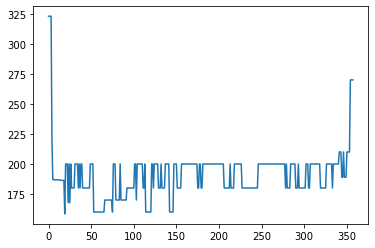

In [4]:
sales_df[:358]['UNIT_PRICE'].plot()

In [5]:
sales_df.loc[sales_df['SCRUB_ITEM']==57]

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
39073,57,20180326,1139,1,1.0,299.99,110.75
39074,57,20180616,2769,1,1.0,299.99,110.75
39075,57,20180621,2887,1,1.0,299.99,110.75
39076,57,20180717,3275,1,1.0,199.99,110.75
39077,57,20180718,3291,1,1.0,199.99,110.75
...,...,...,...,...,...,...,...
39477,57,20210730,70378,1,-1.0,149.99,237.99
39478,57,20210731,70423,1,-1.0,149.99,237.99
39479,57,20210804,70693,1,-1.0,149.99,237.99
39480,57,20210805,70729,1,-1.0,149.99,237.99


In [6]:
sales_df['TIME_DIM_KEY'] = pd.to_datetime(sales_df['TIME_DIM_KEY'],format = "%Y%m%d")

In [7]:
#sales_df['TIME_DIM_KEY'] = sales_df['TIME_DIM_KEY'].astype('object')

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70829 entries, 0 to 70828
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   SCRUB_ITEM      70829 non-null  int64         
 1   TIME_DIM_KEY    70829 non-null  datetime64[ns]
 2   SCRUB_TRANS_NO  70829 non-null  int64         
 3   TRANS_SEQ_NO    70829 non-null  int64         
 4   UNIT_QTY        70829 non-null  float64       
 5   UNIT_PRICE      70829 non-null  float64       
 6   UNIT_COST       70829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 3.8 MB


In [9]:
#sales_df['TIME_DIM_KEY'] = pd.to_datetime(sales_df['TIME_DIM_KEY'],format = '%Y%m%d')

In [10]:
price_df =pd.read_csv("./data/TSC_Price_Changes.csv")

In [11]:
price_df['PRICE_START_DATE'] = pd.to_datetime(price_df['PRICE_START_DATE'])#,format = "%Y%m%d")
#price_df['PRICE_END_DATE'] = pd.to_datetime(price_df['PRICE_END_DATE'])#,format = "%Y%m%d")

In [12]:
price_df['PRICE_END_DATE'] = pd.to_datetime(price_df['PRICE_END_DATE'],errors ='coerce')

In [13]:
price_df

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26,2019-10-03,199.99
1,1,2019-10-04,2019-10-08,179.99
2,1,2019-10-09,2019-10-27,199.99
3,1,2019-10-28,2019-10-29,179.99
4,1,2019-10-30,2019-11-05,199.99
...,...,...,...,...
3881,97,2020-12-06,2020-12-07,19.99
3882,97,2020-12-08,2020-12-12,15.99
3883,97,2020-12-13,2020-12-18,15.99
3884,97,2020-12-19,2020-12-24,15.99


In [14]:
price_df['PRICE_END_DATE'].fillna('2030-01-01',inplace = True)

In [15]:
price_df.sort_values(by = 'PRICE_START_DATE',ascending = True)

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
1060,29,2018-01-22,2030-01-01,59.99
312,9,2018-02-08,2020-11-10,198.80
2660,63,2018-03-02,2020-01-25,189.99
2671,65,2018-05-18,2019-09-13,1199.99
1581,41,2018-07-31,2019-09-15,129.99
...,...,...,...,...
171,5,2021-08-02,2021-08-08,129.99
83,4,2021-08-04,2030-01-01,319.95
2691,67,2021-08-04,2030-01-01,249.99
609,18,2021-08-04,2030-01-01,199.99


In [16]:
price_df.sort_values(by = "PRICE_END_DATE",ascending = False)

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
372,11,2019-11-05,2030-01-01,519.99
3466,88,2021-01-11,2030-01-01,119.99
2587,59,2021-07-28,2030-01-01,174.99
60,2,2020-02-05,2030-01-01,14.99
2447,56,2021-01-11,2030-01-01,1099.99
...,...,...,...,...
3348,85,2019-09-10,2019-09-12,243.48
2692,68,2019-09-12,2019-09-12,117.54
1359,37,2019-09-12,2019-09-12,82.98
3160,80,2019-09-12,2019-09-12,127.49


In [17]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SCRUB_ITEM        3886 non-null   int64         
 1   PRICE_START_DATE  3886 non-null   datetime64[ns]
 2   PRICE_END_DATE    3886 non-null   datetime64[ns]
 3   TSC_PRICE         3886 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 121.6 KB


In [18]:
comp_df =pd.read_csv("./data/Competitors_Price_Changes.csv")

In [19]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90953 entries, 0 to 90952
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SCAN_DATE_TIME               90953 non-null  object 
 1   SCRUB_ITEM                   90953 non-null  int64  
 2   SCRUB_COMPETITOR             90953 non-null  int64  
 3   TSC_PRICE                    90953 non-null  float64
 4   COMPETITOR_PRICE             90953 non-null  float64
 5   CPI_COMPETITIVE_PRICE_INDEX  90953 non-null  float64
 6   COMPETITOR_SHIPPING          51396 non-null  float64
 7   COMPETITOR_REG_PRICE         90953 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 5.6+ MB


In [20]:
comp_df['SCAN_DATE_TIME'] = comp_df['SCAN_DATE_TIME'].str[:10]

In [21]:
comp_df['SCAN_DATE_TIME'] = pd.to_datetime(comp_df['SCAN_DATE_TIME'],format = "%Y-%m-%d")

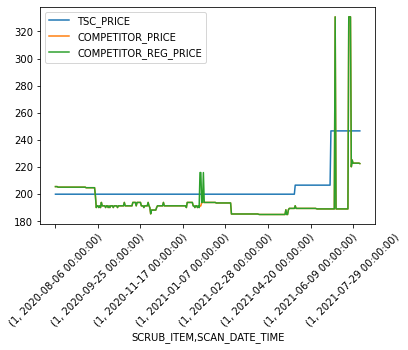

In [22]:
comp_df.groupby(['SCRUB_ITEM','SCAN_DATE_TIME'])[['TSC_PRICE','COMPETITOR_PRICE','COMPETITOR_REG_PRICE']].mean()[:359].plot(rot = 45);

In [23]:
comp_df.sort_values(by = 'SCAN_DATE_TIME',ascending = True)

,SCAN_DATE_TIME,SCRUB_ITEM,SCRUB_COMPETITOR,TSC_PRICE,COMPETITOR_PRICE,CPI_COMPETITIVE_PRICE_INDEX,COMPETITOR_SHIPPING,COMPETITOR_REG_PRICE
0,2020-08-06,1,1,199.99,205.58,102.7951,0.0,205.58
19093,2020-08-06,27,1,339.99,280.24,82.4259,0.0,280.24
19092,2020-08-06,27,1,349.99,280.24,80.0708,0.0,280.24
19091,2020-08-06,27,1,349.99,280.24,80.0708,0.0,280.24
53929,2020-08-06,63,1,189.99,306.83,161.4979,0.0,306.83
...,...,...,...,...,...,...,...,...
11387,2021-08-06,16,1,74.99,65.99,87.9983,NaN,65.99
11386,2021-08-06,16,1,59.99,65.99,110.0016,NaN,65.99
11385,2021-08-06,16,2,74.99,69.11,92.1589,0.0,69.11
16407,2021-08-06,23,3,379.99,388.58,102.2605,0.0,388.58


In [24]:
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90953 entries, 0 to 90952
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SCAN_DATE_TIME               90953 non-null  datetime64[ns]
 1   SCRUB_ITEM                   90953 non-null  int64         
 2   SCRUB_COMPETITOR             90953 non-null  int64         
 3   TSC_PRICE                    90953 non-null  float64       
 4   COMPETITOR_PRICE             90953 non-null  float64       
 5   CPI_COMPETITIVE_PRICE_INDEX  90953 non-null  float64       
 6   COMPETITOR_SHIPPING          51396 non-null  float64       
 7   COMPETITOR_REG_PRICE         90953 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 5.6 MB


In [25]:
import pandasql as ps

In [26]:
sqlcode = '''
select *
from sales_df
inner join price_df on sales_df.SCRUB_ITEM = price_df.SCRUB_ITEM
where sales_df.TIME_DIM_KEY >= price_df.PRICE_START_DATE and sales_df.TIME_DIM_KEY <= price_df.PRICE_END_DATE
'''

#group by sales_df.SCRUB_ITEM

newdf = ps.sqldf(sqlcode,locals())
newdf

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26 00:00:00.000000,13827,1,1.0,179.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
1,1,2019-09-20 00:00:00.000000,14984,1,2.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
2,1,2019-09-23 00:00:00.000000,15090,1,3.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
3,1,2019-09-24 00:00:00.000000,15218,1,1.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
4,1,2019-10-02 00:00:00.000000,15626,1,0.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
...,...,...,...,...,...,...,...,...,...,...,...
57145,97,2021-07-28 00:00:00.000000,70220,1,5.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57146,97,2021-07-28 00:00:00.000000,70246,1,1.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57147,97,2021-07-29 00:00:00.000000,70276,1,1.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57148,97,2021-07-29 00:00:00.000000,70277,1,4.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99


In [27]:
#newdf.to_csv("Price_and_sales",index = False)

In [28]:
newdf

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26 00:00:00.000000,13827,1,1.0,179.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
1,1,2019-09-20 00:00:00.000000,14984,1,2.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
2,1,2019-09-23 00:00:00.000000,15090,1,3.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
3,1,2019-09-24 00:00:00.000000,15218,1,1.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
4,1,2019-10-02 00:00:00.000000,15626,1,0.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
...,...,...,...,...,...,...,...,...,...,...,...
57145,97,2021-07-28 00:00:00.000000,70220,1,5.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57146,97,2021-07-28 00:00:00.000000,70246,1,1.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57147,97,2021-07-29 00:00:00.000000,70276,1,1.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57148,97,2021-07-29 00:00:00.000000,70277,1,4.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99


In [29]:
newdf['TIME_DIM_KEY'] = newdf['TIME_DIM_KEY'].str[:10]

In [30]:
newdf

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26,13827,1,1.0,179.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
1,1,2019-09-20,14984,1,2.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
2,1,2019-09-23,15090,1,3.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
3,1,2019-09-24,15218,1,1.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
4,1,2019-10-02,15626,1,0.0,199.99,132.97,1,2019-08-26 00:00:00.000000,2019-10-03 00:00:00.000000,199.99
...,...,...,...,...,...,...,...,...,...,...,...
57145,97,2021-07-28,70220,1,5.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57146,97,2021-07-28,70246,1,1.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57147,97,2021-07-29,70276,1,1.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99
57148,97,2021-07-29,70277,1,4.0,19.99,11.70,97,2020-12-25 00:00:00.000000,2021-08-18 00:00:00.000000,19.99


In [31]:
newdf['PRICE_START_DATE'] = newdf['PRICE_START_DATE'].str[:10]
newdf['PRICE_END_DATE'] = newdf['PRICE_END_DATE'].str[:10]

In [32]:
newdf

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26,13827,1,1.0,179.99,132.97,1,2019-08-26,2019-10-03,199.99
1,1,2019-09-20,14984,1,2.0,199.99,132.97,1,2019-08-26,2019-10-03,199.99
2,1,2019-09-23,15090,1,3.0,199.99,132.97,1,2019-08-26,2019-10-03,199.99
3,1,2019-09-24,15218,1,1.0,199.99,132.97,1,2019-08-26,2019-10-03,199.99
4,1,2019-10-02,15626,1,0.0,199.99,132.97,1,2019-08-26,2019-10-03,199.99
...,...,...,...,...,...,...,...,...,...,...,...
57145,97,2021-07-28,70220,1,5.0,19.99,11.70,97,2020-12-25,2021-08-18,19.99
57146,97,2021-07-28,70246,1,1.0,19.99,11.70,97,2020-12-25,2021-08-18,19.99
57147,97,2021-07-29,70276,1,1.0,19.99,11.70,97,2020-12-25,2021-08-18,19.99
57148,97,2021-07-29,70277,1,4.0,19.99,11.70,97,2020-12-25,2021-08-18,19.99


In [33]:
df = newdf.copy()

In [34]:
df

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE
0,1,2019-08-26,13827,1,1.0,179.99,132.97,1,2019-08-26,2019-10-03,199.99
1,1,2019-09-20,14984,1,2.0,199.99,132.97,1,2019-08-26,2019-10-03,199.99
2,1,2019-09-23,15090,1,3.0,199.99,132.97,1,2019-08-26,2019-10-03,199.99
3,1,2019-09-24,15218,1,1.0,199.99,132.97,1,2019-08-26,2019-10-03,199.99
4,1,2019-10-02,15626,1,0.0,199.99,132.97,1,2019-08-26,2019-10-03,199.99
...,...,...,...,...,...,...,...,...,...,...,...
57145,97,2021-07-28,70220,1,5.0,19.99,11.70,97,2020-12-25,2021-08-18,19.99
57146,97,2021-07-28,70246,1,1.0,19.99,11.70,97,2020-12-25,2021-08-18,19.99
57147,97,2021-07-29,70276,1,1.0,19.99,11.70,97,2020-12-25,2021-08-18,19.99
57148,97,2021-07-29,70277,1,4.0,19.99,11.70,97,2020-12-25,2021-08-18,19.99


In [35]:
df = df.loc[:,~df.columns.duplicated()]

In [36]:
# df['PROFITS'] = df['UNIT_PRICE']-df['UNIT_COST']

In [37]:
df_w_gross = df.eval(
    '''
    GROSS_MARGIN = (UNIT_QTY * UNIT_PRICE) - (UNIT_QTY * UNIT_COST)
    '''
)

In [38]:
df_w_gross

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE,GROSS_MARGIN
0,1,2019-08-26,13827,1,1.0,179.99,132.97,2019-08-26,2019-10-03,199.99,47.02
1,1,2019-09-20,14984,1,2.0,199.99,132.97,2019-08-26,2019-10-03,199.99,134.04
2,1,2019-09-23,15090,1,3.0,199.99,132.97,2019-08-26,2019-10-03,199.99,201.06
3,1,2019-09-24,15218,1,1.0,199.99,132.97,2019-08-26,2019-10-03,199.99,67.02
4,1,2019-10-02,15626,1,0.0,199.99,132.97,2019-08-26,2019-10-03,199.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...
57145,97,2021-07-28,70220,1,5.0,19.99,11.70,2020-12-25,2021-08-18,19.99,41.45
57146,97,2021-07-28,70246,1,1.0,19.99,11.70,2020-12-25,2021-08-18,19.99,8.29
57147,97,2021-07-29,70276,1,1.0,19.99,11.70,2020-12-25,2021-08-18,19.99,8.29
57148,97,2021-07-29,70277,1,4.0,19.99,11.70,2020-12-25,2021-08-18,19.99,33.16


In [39]:
df_w_gross['UNIT_COST'].sum()

9840704.950000001

In [40]:
Gross_m = df_w_gross.groupby('SCRUB_ITEM')[['UNIT_QTY','GROSS_MARGIN']].sum().sort_values(by = 'GROSS_MARGIN', ascending = False)
Gross_m

,UNIT_QTY,GROSS_MARGIN
SCRUB_ITEM,,
56,1207.0,162157.93
94,2034.0,127201.41
21,395.0,110387.31
73,1502.0,104365.41
44,1238.0,97427.84
...,...,...
84,10.0,8762.10
30,286.0,7922.14
92,38.0,6363.62


In [41]:
Gross_m2 = Gross_m.drop('UNIT_QTY',axis = 1)

<AxesSubplot:>

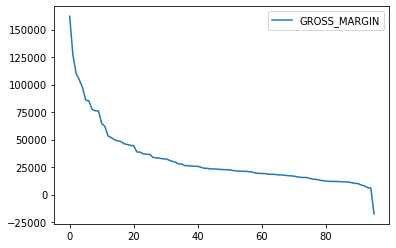

In [42]:
Gross_m2.reset_index().drop('SCRUB_ITEM',axis = 1).plot()

In [43]:
Gross_m['GROSS_MARGIN'].sum()

3080304.0200000005

In [44]:
Gross_m['GROSS_MARGIN'].sum()/df_w_gross['UNIT_COST'].sum()

0.3130166015189796

In [45]:
# save 
df_w_gross.to_csv("Price_and_sales_v2",index = False)

In [46]:
df_w_gross

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE,GROSS_MARGIN
0,1,2019-08-26,13827,1,1.0,179.99,132.97,2019-08-26,2019-10-03,199.99,47.02
1,1,2019-09-20,14984,1,2.0,199.99,132.97,2019-08-26,2019-10-03,199.99,134.04
2,1,2019-09-23,15090,1,3.0,199.99,132.97,2019-08-26,2019-10-03,199.99,201.06
3,1,2019-09-24,15218,1,1.0,199.99,132.97,2019-08-26,2019-10-03,199.99,67.02
4,1,2019-10-02,15626,1,0.0,199.99,132.97,2019-08-26,2019-10-03,199.99,0.00
...,...,...,...,...,...,...,...,...,...,...,...
57145,97,2021-07-28,70220,1,5.0,19.99,11.70,2020-12-25,2021-08-18,19.99,41.45
57146,97,2021-07-28,70246,1,1.0,19.99,11.70,2020-12-25,2021-08-18,19.99,8.29
57147,97,2021-07-29,70276,1,1.0,19.99,11.70,2020-12-25,2021-08-18,19.99,8.29
57148,97,2021-07-29,70277,1,4.0,19.99,11.70,2020-12-25,2021-08-18,19.99,33.16


In [73]:
testing_df = df_w_gross.loc[df_w_gross['SCRUB_ITEM']==1]

In [82]:
a = testing_df.groupby('TIME_DIM_KEY')['SCRUB_ITEM'].count().value_counts()

In [83]:
a

1    125
2     36
3     20
5      6
4      4
6      3
7      1
Name: SCRUB_ITEM, dtype: int64

195

In [80]:
125+36+20+6+4+3+1

195

In [81]:
125/195

0.6410256410256411

In [71]:
df_w_gross.groupby(['SCRUB_ITEM','TIME_DIM_KEY']).count()

SCRUB_TRANS_NO  TRANS_SEQ_NO  UNIT_QTY  UNIT_PRICE  \
SCRUB_ITEM TIME_DIM_KEY                                                       
1          2019-08-26                 1             1         1           1   
           2019-09-20                 1             1         1           1   
           2019-09-23                 1             1         1           1   
           2019-09-24                 1             1         1           1   
           2019-10-02                 1             1         1           1   
...                                 ...           ...       ...         ...   
97         2021-07-26                14            14        14          14   
           2021-07-27                 3             3         3           3   
           2021-07-28                 2             2         2           2   
           2021-07-29                 2             2         2           2   
           2021-08-05                 1             1         1           1   

                         UNIT_COST  PRICE_START_DATE  PRICE_END_DATE  \
SCRUB_ITEM TIME_DIM_KEY                                                
1          2019-08-26            1                 1               1   
           2019-09-20            1                 1               1   
           2019-09-23            1                 1               1   
           2019-09-24            1                 1               1   
           2019-10-02            1                 1               1   
...                            ...               ...             ...   
97         2021-07-26           14                14              14   
           2021-07-27            3                 3               3   
           2021-07-28            2                 2               2   
           2021-07-29            2                 2               2   
           2021-08-05            1                 1               1   

                         TSC_PRICE  GROSS_MARGIN  
SCRUB_ITEM TIME_DIM_KEY                           
1          2019-08-26            1             1  
           2019-09-20            1             1  
           2019-09-23            1             1  
           2019-09-24            1             1  
           2019-10-02            1             1  
...                            ...           ...  
97         2021-07-26           14            14  
           2021-07-27            3             3  
           2021-07-28            2             2  
           2021-07-29            2             2  
           2021-08-05            1             1  

[15226 rows x 9 columns]

In [47]:
m = Prophet()

In [48]:
price_df.loc[price_df["SCRUB_ITEM"] == 27]

,SCRUB_ITEM,PRICE_START_DATE,PRICE_END_DATE,TSC_PRICE


In [49]:
sales_df.loc[sales_df["SCRUB_ITEM"] == 80].sort_values(by = 'UNIT_QTY', ascending = False)

,SCRUB_ITEM,TIME_DIM_KEY,SCRUB_TRANS_NO,TRANS_SEQ_NO,UNIT_QTY,UNIT_PRICE,UNIT_COST
54745,80,2021-04-13,59999,1,5.0,139.99,86.17
54821,80,2021-05-11,63215,1,4.0,139.99,86.17
54556,80,2020-10-09,39741,1,4.0,111.99,86.17
54712,80,2021-03-12,56238,1,4.0,125.99,86.17
54813,80,2021-05-10,63066,1,4.0,139.99,86.17
...,...,...,...,...,...,...,...
54734,80,2021-04-08,59356,1,-1.0,125.99,86.17
54731,80,2021-04-02,58836,1,-1.0,125.99,86.17
54508,80,2020-06-11,32705,1,-2.0,149.99,86.17
54478,80,2020-05-26,31579,1,-2.0,149.99,86.17


In [50]:
984/2793

0.3523093447905478

In [51]:
comp_df

,SCAN_DATE_TIME,SCRUB_ITEM,SCRUB_COMPETITOR,TSC_PRICE,COMPETITOR_PRICE,CPI_COMPETITIVE_PRICE_INDEX,COMPETITOR_SHIPPING,COMPETITOR_REG_PRICE
0,2020-08-06,1,1,199.99,205.58,102.7951,0.0,205.58
1,2020-08-06,1,2,199.99,205.58,102.7951,0.0,205.58
2,2020-08-07,1,1,199.99,205.58,102.7951,0.0,205.58
3,2020-08-07,1,2,199.99,205.58,102.7951,0.0,205.58
4,2020-08-08,1,1,199.99,205.58,102.7951,0.0,205.58
...,...,...,...,...,...,...,...,...
90948,2021-08-02,97,2,19.99,27.16,135.8679,0.0,27.16
90949,2021-08-03,97,2,19.99,27.16,135.8679,0.0,27.16
90950,2021-08-04,97,2,19.99,27.16,135.8679,0.0,27.16
90951,2021-08-05,97,2,19.99,36.92,184.6923,0.0,36.92


In [52]:
comp_df["SCRUB_COMPETITOR"].unique()

array([1, 2, 3])

In [53]:
comp1 = comp_df.loc[comp_df['SCRUB_COMPETITOR'] == 1 ]#& comp_df['SCRUB_ITEM']== 1]
comp2 = comp_df.loc[comp_df['SCRUB_COMPETITOR'] == 2 ]#& comp_df['SCRUB_ITEM']== 1]
comp3 = comp_df.loc[comp_df['SCRUB_COMPETITOR'] == 3 ]

In [54]:
len(comp3['SCRUB_ITEM'].unique())

74

In [103]:
comp1_item1 = comp1.loc[comp1['SCRUB_ITEM'] == 56]
comp2_item1 = comp2.loc[comp2['SCRUB_ITEM'] == 56]
comp3_item1 = comp3.loc[comp3['SCRUB_ITEM'] == 56]

In [104]:
comp1_item1

,SCAN_DATE_TIME,SCRUB_ITEM,SCRUB_COMPETITOR,TSC_PRICE,COMPETITOR_PRICE,CPI_COMPETITIVE_PRICE_INDEX,COMPETITOR_SHIPPING,COMPETITOR_REG_PRICE


In [105]:
import matplotlib.pyplot as plt

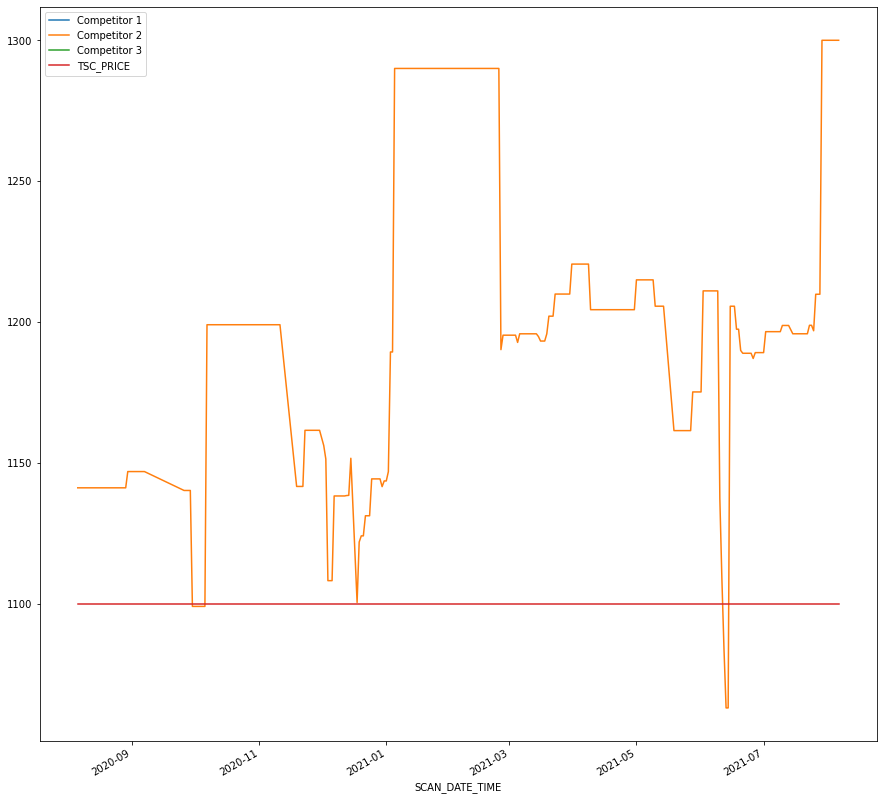

In [106]:
fig, ax = plt.subplots(figsize = (15,15));
fig = comp1_item1.plot(x = 'SCAN_DATE_TIME',y = 'COMPETITOR_REG_PRICE',ax=ax,label = 'Competitor 1');
comp2_item1.plot(x = 'SCAN_DATE_TIME',y = 'COMPETITOR_REG_PRICE',ax=ax, label = 'Competitor 2');
comp3_item1.plot(x = 'SCAN_DATE_TIME',y = 'COMPETITOR_REG_PRICE',ax=ax,label = 'Competitor 3');
comp2_item1.plot(x = 'SCAN_DATE_TIME', y = 'TSC_PRICE',ax=ax)
plt.legend();

In [93]:
model = Prophet()

<AxesSubplot:xlabel='SCAN_DATE_TIME'>

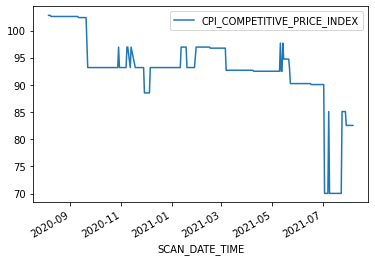

In [94]:
comp2_item1.plot(x = 'SCAN_DATE_TIME',y ='CPI_COMPETITIVE_PRICE_INDEX')

In [95]:
comp2_item_56 = comp2_item1[['SCAN_DATE_TIME','COMPETITOR_REG_PRICE']]

In [96]:
comp2_item_56 = comp2_item_56.rename(columns = {'SCAN_DATE_TIME':"ds", "COMPETITOR_REG_PRICE":"y"})

In [97]:
model.fit(comp2_item_56)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [98]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
371,2021-09-01
372,2021-09-02
373,2021-09-03
374,2021-09-04
375,2021-09-05


In [99]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-08-06,209.190130,197.622352,220.648485
1,2020-08-07,206.918055,196.100248,218.632924
2,2020-08-08,207.190946,196.244143,217.710876
3,2020-08-09,207.978006,196.303993,219.398723
4,2020-08-10,206.253395,194.681835,218.342366
...,...,...,...,...
371,2021-09-01,217.640867,206.700683,229.143445
372,2021-09-02,218.696312,206.949802,229.416600
373,2021-09-03,217.004005,205.987631,228.131810
374,2021-09-04,217.856662,206.392824,229.779909


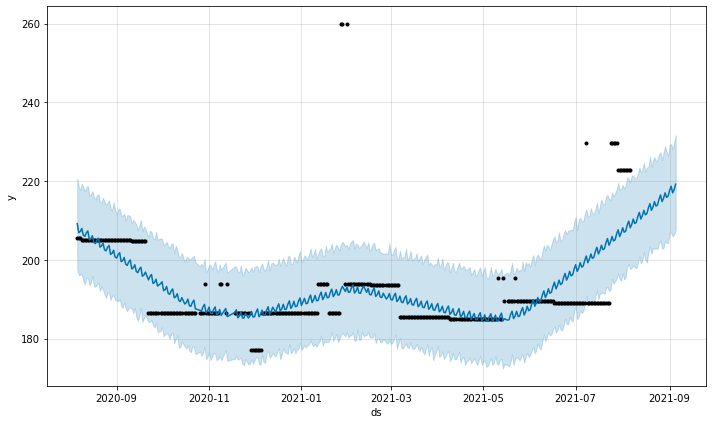

In [100]:
fig1 = model.plot(forecast)

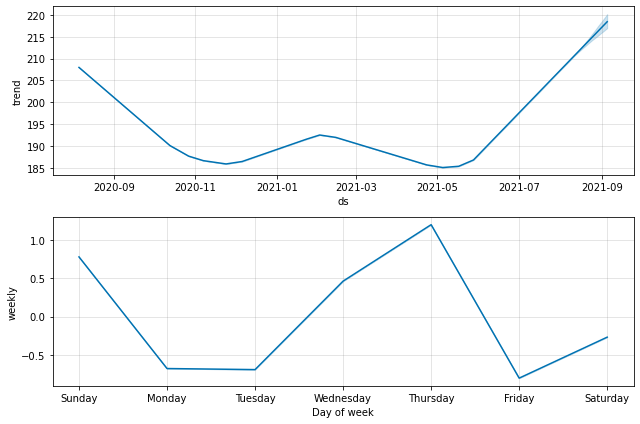

In [101]:
fig2 = model.plot_components(forecast)

In [102]:
comp2_item1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 1 to 1012
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   SCAN_DATE_TIME               346 non-null    datetime64[ns]
 1   SCRUB_ITEM                   346 non-null    int64         
 2   SCRUB_COMPETITOR             346 non-null    int64         
 3   TSC_PRICE                    346 non-null    float64       
 4   COMPETITOR_PRICE             346 non-null    float64       
 5   CPI_COMPETITIVE_PRICE_INDEX  346 non-null    float64       
 6   COMPETITOR_SHIPPING          346 non-null    float64       
 7   COMPETITOR_REG_PRICE         346 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 24.3 KB
